In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

In [21]:
# Initialize a population of paths (chromosomes)
def initialize_population(nodes,pop_size):
    max_nod_num = max(nodes)
    population = []
    for i in range(pop_size):
        chromosome = []
        # Create a fully connected path
        while len(chromosome) != len(nodes):
            rand_node = np.random.randint(max_nod_num+1)
            # Prevent repeated additions of nodes in the same chromosome
            if rand_node not in chromosome:
                chromosome.append(rand_node)
        population.append(chromosome)
    return population

In [22]:
# Calculate the total cost (distance) of a path
def fitness(distance_matrix, chromosome):
    total_cost = 0
    for i in range(1, len(chromosome)):
        total_cost += distance_matrix[chromosome[i-1]][chromosome[i]]
    total_cost += distance_matrix[chromosome[-1]][chromosome[0]]
    return total_cost

In [23]:
# Select the best (shortest) paths from the population
def selection(parent_gen,graph_edges,elite_size):
    costs = []
    selected_parent = []
    pop_fitness = []
    for i in range(len(parent_gen)):
        costs.append(fitness(graph_edges,parent_gen[i]))
        pop_fitness.append((costs[i],parent_gen[i]))
    # Sort according to path costs
    pop_fitness.sort(key = lambda x: x[0])
    # Select only top elite_size fittest chromosomes in the population
    for i in range(elite_size):
        selected_parent.append(pop_fitness[i][1])
    return selected_parent,pop_fitness[0][0],selected_parent[0]

In [24]:
# Perform crossover to create new paths
def crossover(parents, pop_size):
    children = []
    n_parents = len(parents)
    for _ in range(pop_size):
        # Choose random parents
        parent1 = parents[np.random.randint(low=0, high=n_parents-1)]
        parent2 = parents[np.random.randint(low=0, high=n_parents-1)]
        # Breed to create a child
        child = []
        childP1 = []
        childP2 = []
        geneA = int(random.random() * len(parent1))
        geneB = int(random.random() * len(parent1))
        if geneA < geneB :
            startGene, endGene = geneA, geneB
        else :
            endGene, startGene = geneA, geneB
        for i in range(startGene, endGene):
            childP1.append(parent1[i])

        childP2 = [item for item in parent2 if item not in childP1]
        child = childP1 + childP2
        # Add the child to the new population
        children.append(child)
    return children

In [25]:
# Perform mutation to introduce variation
def mutation(population, n_mutations):
    mutated_pop = []
    
    for ind in range(len(population)):
        parent = population[ind]
        size1 = len(parent)
        max_nod_num = max(parent)
        
        for _ in range(n_mutations):
            rand1 = np.random.randint(0, size1)
            rand2 = np.random.randint(0, size1)
            if rand1 == rand2:
                rand2 = (rand2 + 1) % size1
            parent[rand1], parent[rand2] = parent[rand2], parent[rand1]
        
        mutated_pop.append(parent)
    
    return mutated_pop

In [26]:
# Main function to run the genetic algorithm
def genetic_algorithm(distance_matrix, nodes, pop_size, elite_size, n_mutations, n_generations):
    # Initialize population
    population = initialize_population(nodes, pop_size)
    
    # Iterate over generations
    for i in range(n_generations):
        # Select the best individuals
        parents, min_cost, best_path = selection(population, distance_matrix, elite_size)
        # Ensure the first node in the best path is always 0
        zero_index = best_path.index(0)
        best_path = best_path[zero_index:] + best_path[:zero_index]
        # Breed to create children
        children = crossover(parents, pop_size - elite_size)
        # Mutate children
        children = mutation(children, n_mutations)
        # Create new population
        population = parents + children
    # Select the best individuals from the final generation
    final_parents, final_min_cost, final_best_path = selection(population, distance_matrix, elite_size)
    
    # Ensure the first node in the final best path is always 0
    zero_index = final_best_path.index(0)
    final_best_path = final_best_path[zero_index:] + final_best_path[:zero_index]
    
    # Return the best path and its cost
    return final_best_path, final_min_cost

In [27]:
# Example usage:
distance_matrix = [[0, 29, 20, 21, 16],
                   [29, 0, 15, 19, 28],
                   [20, 15, 0, 13, 25],
                   [21, 19, 13, 0, 17],
                   [16, 28, 25, 17, 0]]
nodes = [0, 1, 2, 3, 4]
pop_size = 100
elite_size = 20
n_mutations = 5
n_generations = 500

best_path, min_cost = genetic_algorithm(distance_matrix, nodes, pop_size, elite_size, n_mutations, n_generations)
print("The path : ", end="")
print(" -> ".join(map(str, best_path)), end=" -> ")
print(best_path[0])
print("Total cost : ", min_cost)

The path : 0 -> 4 -> 3 -> 1 -> 2 -> 0
Total cost :  87


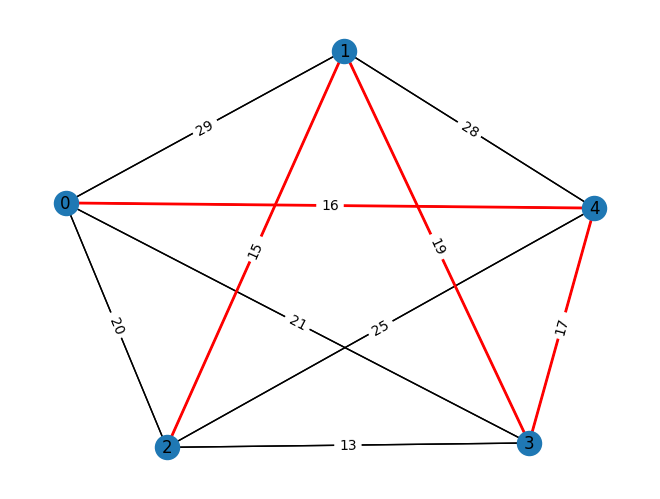

In [28]:
#Visualization
# Create a graph
G = nx.Graph()

# Add nodes
for node in nodes:
    G.add_node(node)

# Add edges and their weights (i.e., distances)
for i in range(len(distance_matrix)):
    for j in range(i+1, len(distance_matrix[i])):
        G.add_edge(i, j, weight=distance_matrix[i][j])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Draw all edges in black
nx.draw_networkx_edges(G, pos)

# Draw the best path in red
path_edges = [(best_path[i-1], best_path[i]) for i in range(1, len(best_path))]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

# Display the weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Show the plot
plt.show()
